## Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib
%matplotlib inline

import pickle
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.contrib.layers import flatten

from sklearn.utils import shuffle
from skimage.transform import AffineTransform, rotate, rescale, swirl, warp
from skimage.exposure import equalize_hist

In [12]:
# Load pickled data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

class_name_mapping = pd.read_csv('signnames.csv', index_col=0).to_dict()['SignName']

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [13]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: W
hat's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(class_name_mapping)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Object `image` not found.
Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [ ]:
hat's the shape of an traffic sign image

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

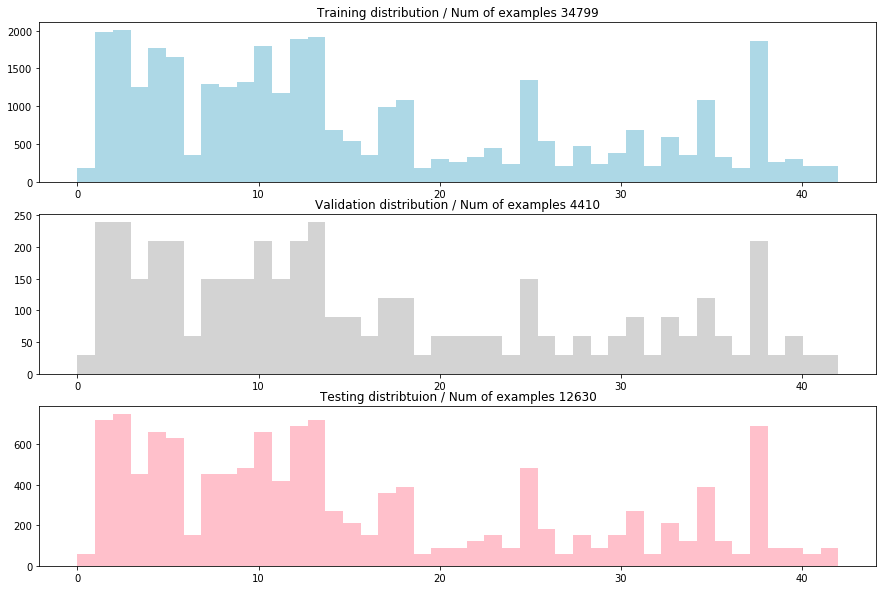

In [4]:
### Data exploration visualization code goes here.

# plotting distribution of class labels
fig = plt.figure(num='Title', figsize=(15,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.hist(y_train, n_classes, facecolor = 'lightblue')
ax1.set_title('Training distribution / Num of examples ' + str(len(y_train)))

ax2.hist(y_valid, n_classes, facecolor = 'lightgray')
ax2.set_title('Validation distribution / Num of examples ' + str(len(y_valid)))

ax3.hist(y_test, n_classes, facecolor = 'pink')
ax3.set_title('Testing distribtuion / Num of examples ' + str(len(y_test)))
plt.show()

The distribution is more or less similar among the three datasets (training, validation, and testing). But it is not balanced, meaning there are more examples of one class/classes than others. This adds bias to our model and affects the overall accuracy. In order to fix this, we can use technique such as augmentation. The augmentation technique creates additional data for low-numbered classes by using different transformation operations. We will look into it later.

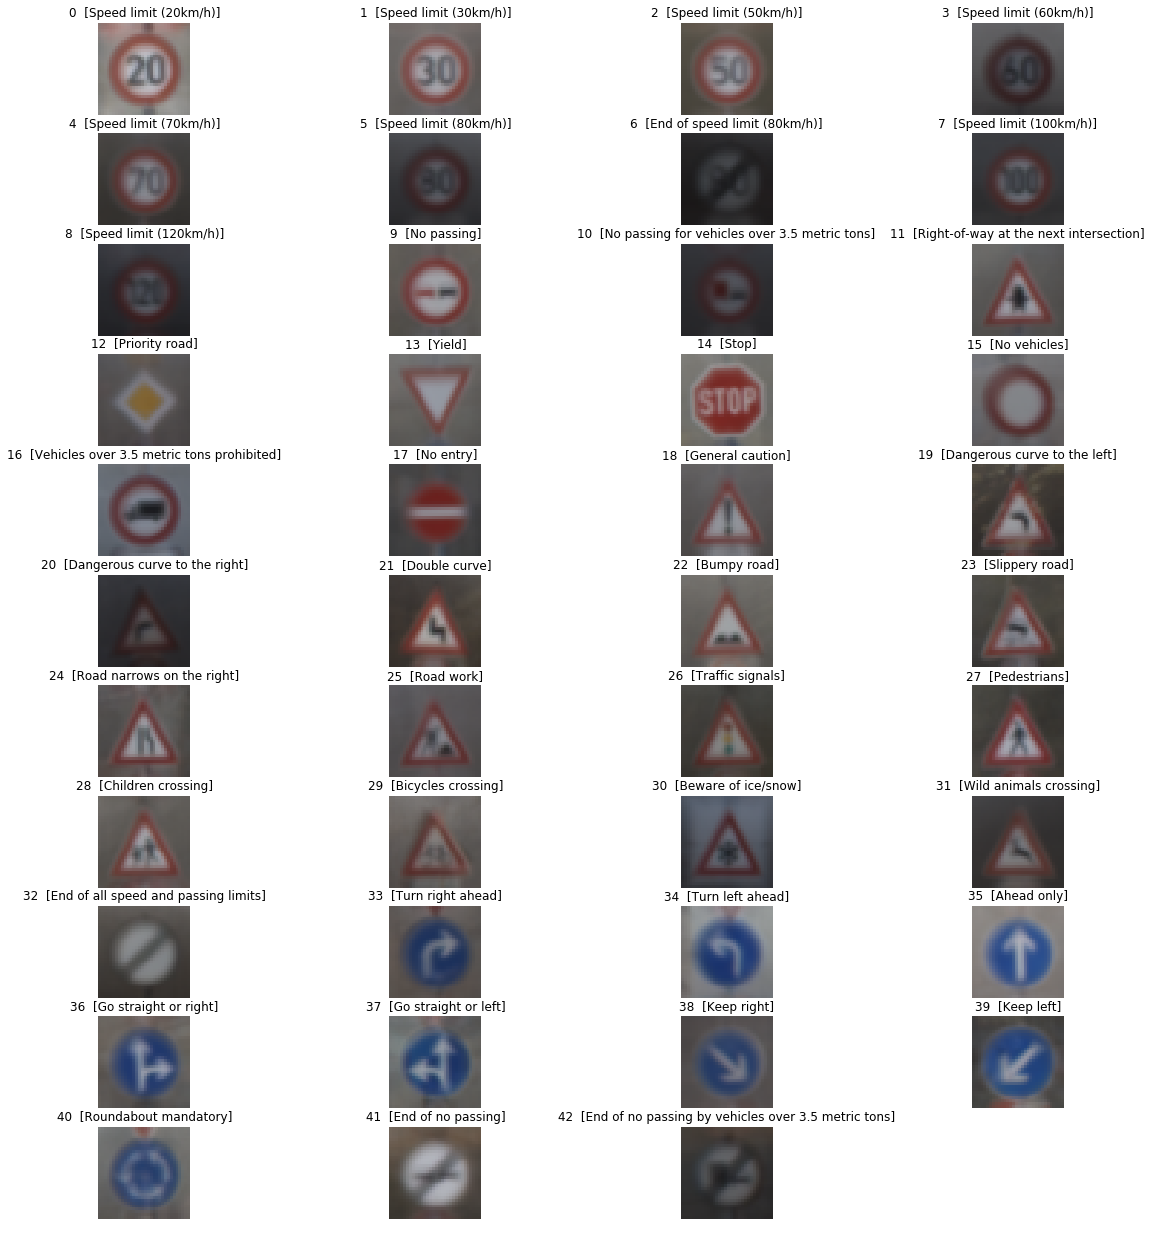

In [5]:
#plotting mean images for each classes

def mean_img(class_x):
    index = list(np.where(y_train == class_x)[0])
    batch = np.array(X_train[index])
    img = np.mean(batch, axis = 0).astype(np.uint8)
    return img

plt.figure(figsize=(20,  22))
for i in range(n_classes):
    plt.subplot(11, 4, i+1)
    img_i = mean_img(i)
    plt.imshow(img_i)
    plt.title(str(i) + '  [' + class_name_mapping[i] + ']')
    plt.axis('off')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

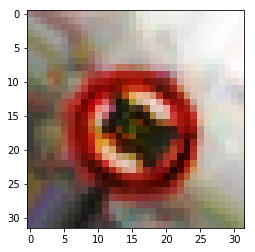

In [6]:
img_X = X_train[100]
new_img = equalize_hist(rotate(img_X, random.randint(-45, 45), mode='edge'))
new_img = np.array((new_img*255), dtype=np.uint8)
plt.imshow(new_img)

In [7]:
def augment_image(img):    
    new_imgs = []
    for i in range(0, 5):
        img1 = equalize_hist(rotate(img, random.randint(-45, 45), mode='edge'))
        img1 = np.array((img1*255), dtype=np.uint8)
        img2 = equalize_hist(swirl(img, strength=random.uniform(-1, 1), mode='edge'))
        img2 = np.array((img2*255), dtype=np.uint8)
        new_imgs.append(img1)
        new_imgs.append(img2)
    return np.array(new_imgs)

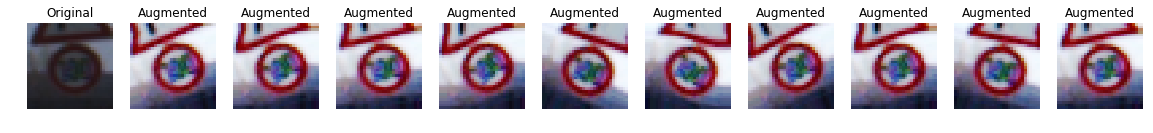

In [8]:
img = X_train[random.randint(-888, n_train)]

def plot_augmented_imgs(img):
    new_imgs = augment_image(img)
    plt.figure(figsize=(20,5))
    plt.subplot(1,11,1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    for i in range(0,len(new_imgs)):
        plt.subplot(1,11,i+2)
        plt.imshow(new_imgs[i])
        plt.title('Augmented')
        plt.axis('off')

plot_augmented_imgs(img)

### Normalization

In [6]:
def normalize(data):
    return (data-128.0)/128

In [10]:
X_train_norm = normalize(X_train)
X_valid_norm = normalize(X_valid)
X_test_norm = normalize(X_test)

(-0.5, 31.5, 31.5, -0.5)

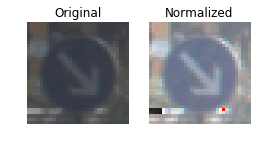

In [11]:
plt.figure(figsize=(4,8))
plt.subplot(1,2,1)
plt.imshow(X_train[-9919])
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(X_train_norm[-9919])
plt.title('Normalized')
plt.axis('off')


### Model Architecture : LeNet

In [12]:
def LeNet(x):
    
    mu = 0
    sigma = 0.1
    
    # Convolutional Layer 1. Input 32x32x3. Ouput 28x28x6
    kernel_1 = tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6), mean = mu, stddev = sigma))
    bias_1 = tf.Variable(tf.zeros(6))
    conv_1 = tf.nn.conv2d(x, kernel_1, strides = [1, 1, 1, 1], padding = 'VALID') + bias_1
    # ReLU activation function
    conv_1 = tf.nn.relu(conv_1)
    # Average pooling. Output 14x14x6
    conv_1 = tf.nn.avg_pool(conv_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    # Convolutional Layer 2. Input 14x14x6. Output 10x10x16
    kernel_2 = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    bias_2 = tf.Variable(tf.zeros(16))
    conv_2 = tf.nn.conv2d(conv_1, kernel_2, strides = [1, 1, 1, 1], padding = 'VALID') + bias_2
    conv_2 = tf.nn.relu(conv_2)
    # Average pooling. output 5x5x16
    conv_2 = tf.nn.avg_pool(conv_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    # Fully connnected layer. Input 5x5x16. Output 400
    flat = flatten(conv_2)
    
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc_1 = tf.matmul(flat, fc1_w) + fc1_b
    fc_1 = tf.nn.relu(fc_1)
    fc_1 = tf.nn.dropout(fc_1, keep_prob)
    
    fc2_w = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(100))
    fc_2 = tf.matmul(fc_1, fc2_w) + fc2_b
    fc_2 = tf.contrib.layers.batch_norm(fc_2, center=True, scale=True, is_training=flag)
    fc_2 = tf.nn.relu(fc_2)
    fc_2 = tf.nn.dropout(fc_2, keep_prob)
    
    fc3_w = tf.Variable(tf.truncated_normal(shape = (100, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc_2, fc3_w) + fc3_b
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
# placeholders and training operations

tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32)
flag = tf.placeholder(tf.bool)

learning_rate = 0.005
logits = LeNet(x)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)


y_pred = tf.argmax(logits, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        acc =  sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob:1, flag:0})
        total_accuracy += (acc * len(batch_x))
    return total_accuracy / num_examples

(34799, 32, 32, 3) (34799,)
Speed limit (70km/h)


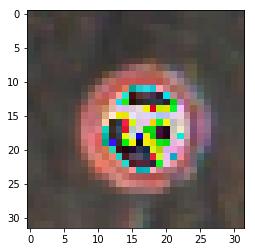

In [15]:
# verifying data

data_X, data_y = X_train_norm, y_train
data_X, data_y = shuffle(data_X, data_y)

print(data_X.shape, data_y.shape)
r = random.randint(0, len(data_X))
print(class_name_mapping[data_y[r]])
plt.imshow(data_X[r])

In [16]:
EPOCHS = 50
BATCH_SIZE = 150

y_predicted_train = []
y_predicted_valid = []
y_predicted_test = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(data_X)
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = data_X[offset:offset + BATCH_SIZE], data_y[offset:offset + BATCH_SIZE]
            _, L = sess.run([optimizer, loss], feed_dict={x:batch_x, y:batch_y, keep_prob:0.5, flag:1})
        training_accuracy = evaluate(data_X, data_y)
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        if i%5 == 0:
            print('Epoch: ', i, ' | Loss: ', round(L, 3), ' | Training Acc: ', round(training_accuracy, 3), ' | Validation Acc: ', round(validation_accuracy, 3))
    
    
    y_predicted_train.append(sess.run(y_pred, feed_dict={x:data_X, y: data_y, keep_prob:1.0, flag:0}))
    y_predicted_valid.append(sess.run(y_pred, feed_dict={x:X_valid_norm, y:y_valid, keep_prob:1.0, flag:0}))
    y_predicted_test.append(sess.run(y_pred, feed_dict={x:X_test, y:y_test, keep_prob:1.0, flag:0}))
    
    test_accuracy = sess.run(accuracy, feed_dict={x: X_test_norm, y: y_test, keep_prob:1.0, flag:0})

    print('---------------------')
    y_predicted_test = y_predicted_test[0].tolist()
    print('Testing accuracy', test_accuracy)

Epoch:  0  | Loss:  0.923  | Training Acc:  0.821  | Validation Acc:  0.766
Epoch:  5  | Loss:  0.126  | Training Acc:  0.976  | Validation Acc:  0.941
Epoch:  10  | Loss:  0.127  | Training Acc:  0.99  | Validation Acc:  0.938
Epoch:  15  | Loss:  0.082  | Training Acc:  0.991  | Validation Acc:  0.944
Epoch:  20  | Loss:  0.151  | Training Acc:  0.994  | Validation Acc:  0.95
Epoch:  25  | Loss:  0.047  | Training Acc:  0.995  | Validation Acc:  0.95
Epoch:  30  | Loss:  0.02  | Training Acc:  0.995  | Validation Acc:  0.952
Epoch:  35  | Loss:  0.125  | Training Acc:  0.997  | Validation Acc:  0.955
Epoch:  40  | Loss:  0.049  | Training Acc:  0.998  | Validation Acc:  0.95
Epoch:  45  | Loss:  0.024  | Training Acc:  0.998  | Validation Acc:  0.961
---------------------
Testing accuracy 0.942202


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


input_shape = (32, 32, 3)

model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile('adam', 'categorical_crossentropy', ['accuracy'])

print(model.summary())

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 32, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 30, 30, 32)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 30, 30, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [18]:
history = model.fit(X_train_norm, np_utils.to_categorical(y_train), nb_epoch=100, batch_size=128, 
                    validation_data=(X_valid_norm, np_utils.to_categorical(y_valid)), shuffle=True)

Train on 34799 samples, validate on 4410 samples
Epoch 1/100
34799/34799 [==============================] - 10s - loss: 2.4604 - acc: 0.3563 - val_loss: 1.8416 - val_acc: 0.7295

In [19]:
# saving the model
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')
print('Saved model to disk')

Saved model to disk


In [20]:
test_acc = model.evaluate(X_test_norm, np_utils.to_categorical(y_test))
print('\nLoss:', test_acc[0], 'Accuracy:', test_acc[1])

12448/12630 [============================>.] - ETA: 0s

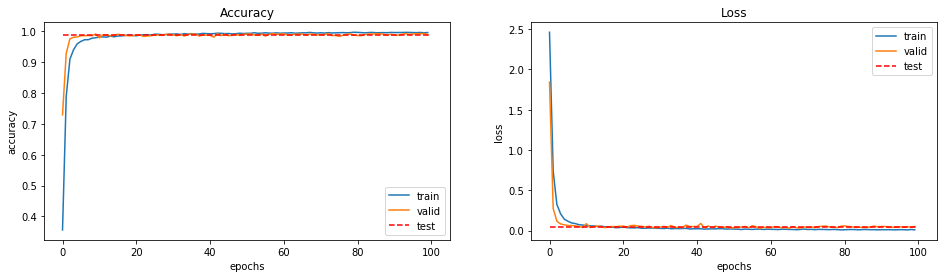

In [21]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot([0, 100], [test_acc[1], test_acc[1]], 'r--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'valid', 'test'], loc='lower right')
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot([0, 100], [test_acc[0], test_acc[0]], 'r--')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'valid', 'test'], loc='upper right')

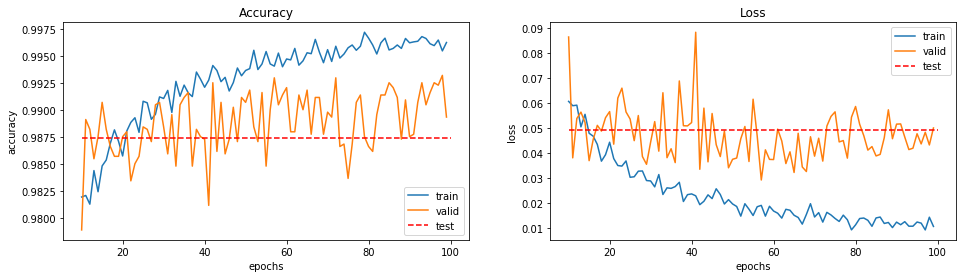

In [22]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(np.arange(10,100), history.history['acc'][10:])
plt.plot(np.arange(10,100), history.history['val_acc'][10:])
plt.plot([10, 100], [test_acc[1], test_acc[1]], 'r--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'valid', 'test'], loc='lower right')
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(np.arange(10,100), history.history['loss'][10:])
plt.plot(np.arange(10,100), history.history['val_loss'][10:])
plt.plot([10, 100], [test_acc[0], test_acc[0]], 'r--')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'valid', 'test'], loc='upper right')

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_predicted_test = np.argmax(model.predict(X_test), axis=1)
conf = confusion_matrix(y_test, y_predicted_test)

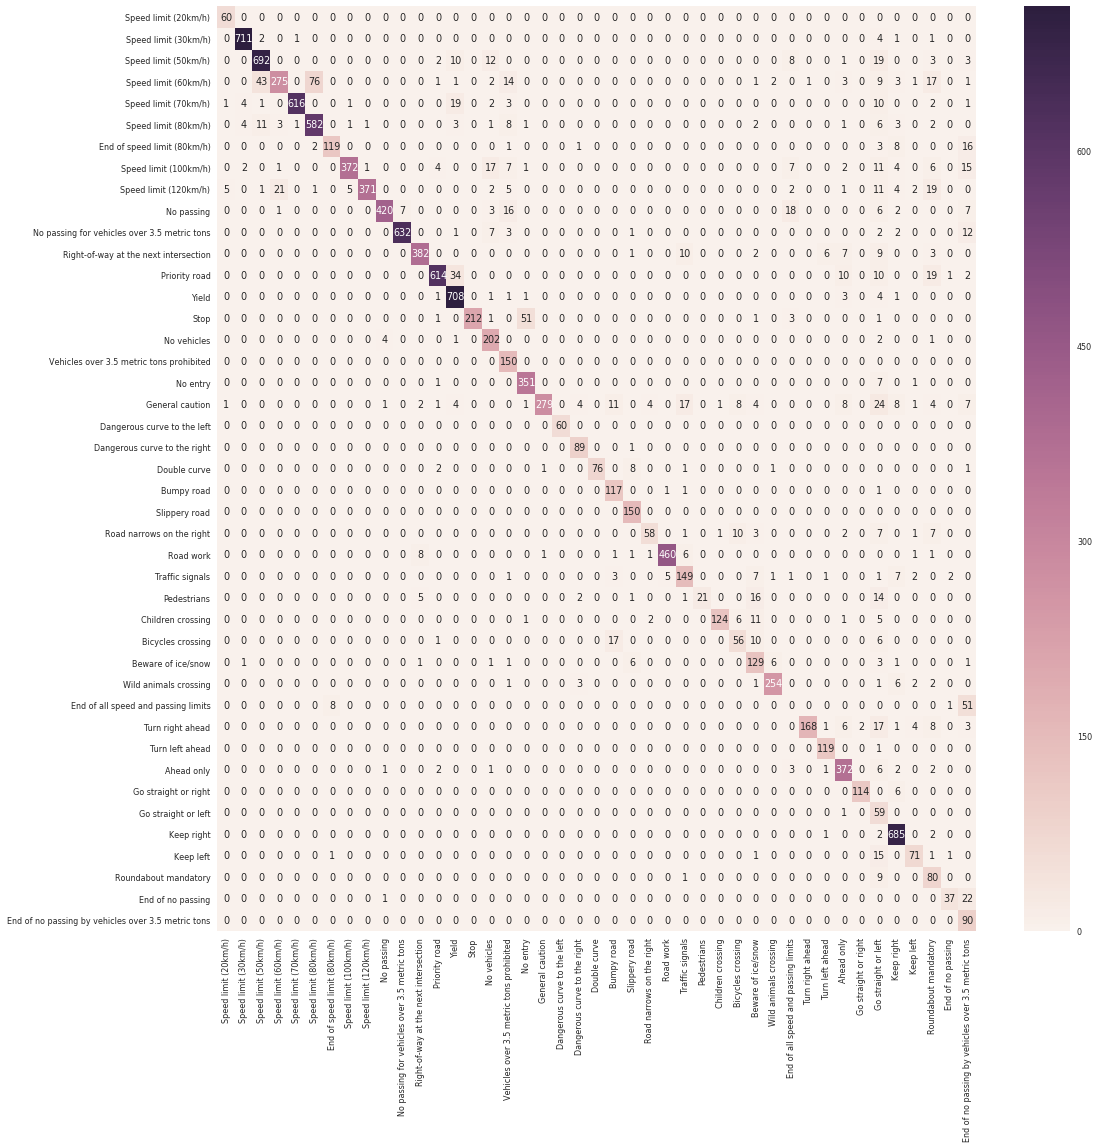

In [24]:
df_conf = pd.DataFrame(conf, index=[i for i in class_name_mapping.values()], columns=[i for i in class_name_mapping.values()])
plt.figure(figsize=(17,17))
sn.set(font_scale=0.8)
sn.heatmap(df_conf, annot=True, fmt='g')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

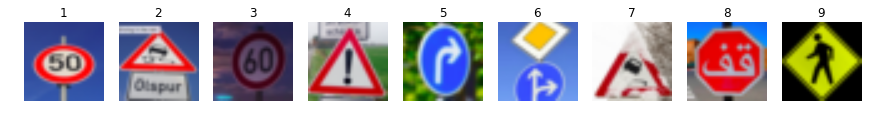

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from scipy.misc import imresize
from scipy.misc import imread

imgs = [img_i for img_i in os.listdir('new_images') if '.jpg' in img_i]
files = [os.path.join('new_images', img_i) for img_i in imgs]

# make square dimension
def make_square(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        crop = img[extra // 2:-extra // 2, :, :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        crop = img[:, extra // 2:-extra // 2, :]
    else:
        crop = img
    return crop

imgs=[]
for i in files:
    img = imread(i, mode="RGB")
#     print(img.shape)
    imgs.append(imresize(make_square(img), (32, 32)))
new_data = np.array(imgs)

plt.figure(figsize=(15, 4))
for i in range(0, len(new_data)):
    plt.subplot(1, 9, i+1)
    plt.imshow(new_data[i])
    plt.title(str(i+1))
    plt.axis('off')

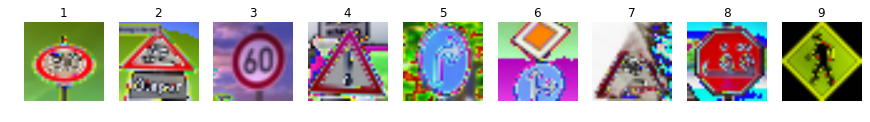

In [15]:
# normalize
new_data_norm = normalize(new_data)

plt.figure(figsize=(15, 4))
for i in range(0, len(new_data_norm)):
    plt.subplot(1, 9, i+1)
    plt.imshow(new_data_norm[i])
    plt.title(str(i+1))
    plt.axis('off')

### Predict the Sign Type for Each Image

In [16]:
# Load the model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('model.h5')
print('Loaded model')

# loaded_model = model

Loaded model


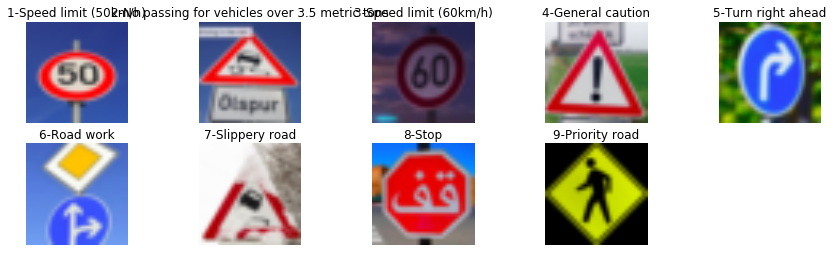

In [17]:
# Predict the sign
scores = loaded_model.predict(new_data_norm)
labels = np.argmax(scores, axis=1)
labels = [class_name_mapping[i] for i in labels]

plt.figure(figsize=(15, 4))
for i in range(0, len(new_data)):
    plt.subplot(2, 5, i+1)
    plt.imshow(new_data[i])
    plt.title(str(i+1) + '-' + labels[i])
    plt.axis('off')

### Analyze Performance

The model correctly predicted most of the images. But it misclassified three images: image 2, image 6 and image 7. For image 2, the correct label is "Pedestrians" but our model classified it as "Priority Road". This is because it has similar diamond shape structure and color which confuses our model. For image 6, the correct label would be either "Priority Road" or "Go straight or right" because it contains two signs but our model outputed "Road work". This is a tricky example for our model because our training examples contains only a single sign image. Also, our model failed to output correct label for image 7. For image 4, our model was able to output correct label which suggests that our model was able to learn true representation for that specific class, and by looking at the confusion matrix, we can see that our model successfully classified all the test examples from that class. What is interesting is that the model successfully predict the "Stop Sign" despite being in a different language. The model relied on different features such as color and shape to predict the output rather than the actual text.
<hr>
Total Examples = 9 <br>
Correct Examples = 6 <br>
Incorrect Examples = 3 <br>
Accuracy = 66.7%

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

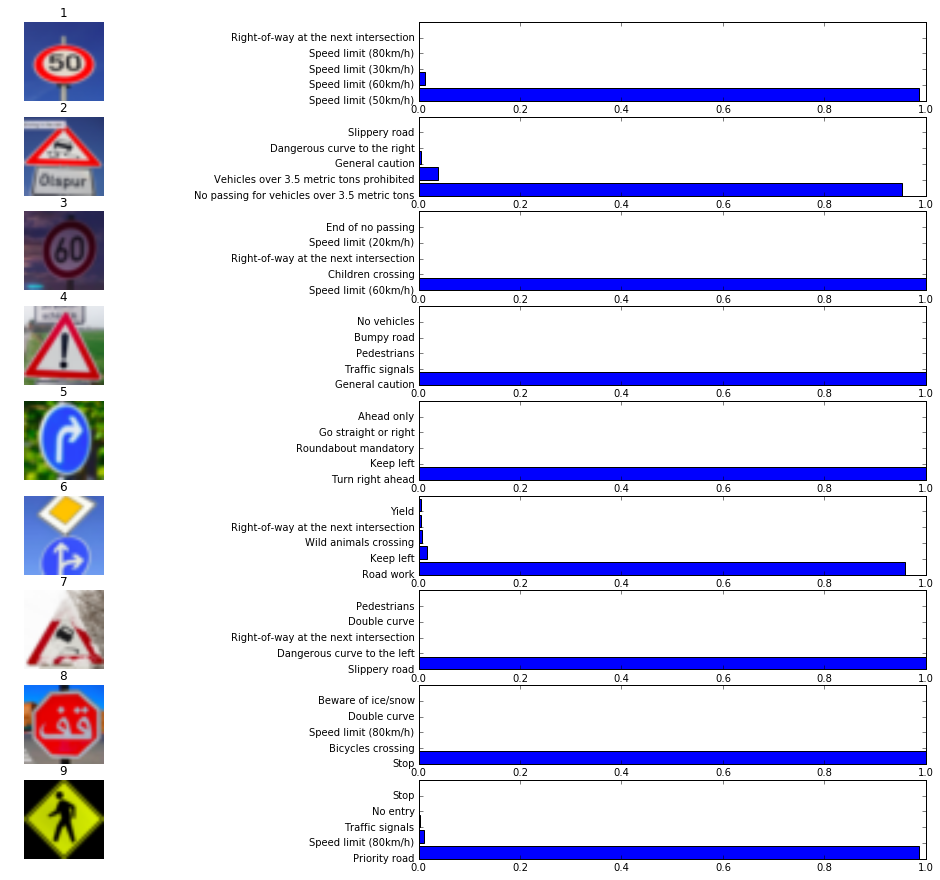

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

prob = tf.nn.top_k(scores,k=5)
with tf.Session() as sess:
    prob = (sess.run(prob))

plt.figure(figsize=(20,15))
for i in range(len(new_data)):
    plt.subplot(9, 2, 2*i+1)
    plt.imshow(new_data[i])
    plt.title(i+1)
    plt.axis('off')
    plt.subplot(9, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), prob[0][i, :])
    label= [class_name_mapping[j] for j in prob[1][i]]
    plt.yticks(np.arange(1, 6, 1), label)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.